In [77]:
!pip install arithmetic_compressor
!rm -r image_compression
!git clone https://github.com/nikitaromanoov/image_compression/

Cloning into 'image_compression'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 105 (delta 51), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 26.33 KiB | 2.92 MiB/s, done.
Resolving deltas: 100% (51/51), done.


# 2B

In [78]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/enciderdecoder-2/encoder (7).pth"  --path_image "/kaggle/input/datasettest/peppers.png" --path_result  "2b_peppers.json"
!python image_compression/decoder.py --path_decoder "/kaggle/input/enciderdecoder-2/decoder (7).pth"  --path_compressed "2b_peppers.json" --path_result "2b_peppers.png"

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[1.7067, 1.5621, 1.1170,  ..., 1.8793, 0.8152, 2.5551]],
       grad_fn=<ViewBackward0>)


In [79]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/enciderdecoder-2/encoder (7).pth"  --path_image "/kaggle/input/datasettest/baboon.png" --path_result  "2b_baboon.json"
!python image_compression/decoder.py --path_decoder "/kaggle/input/enciderdecoder-2/decoder (7).pth"  --path_compressed "2b_baboon.json" --path_result "2b_baboon.png"

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[1.0312, 0.7448, 0.5190,  ..., 1.0337, 0.8235, 1.6852]],
       grad_fn=<ViewBackward0>)


In [80]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/enciderdecoder-2/encoder (7).pth"  --path_image "/kaggle/input/datasettest/lena.png" --path_result  "2b_lena.json"
!python image_compression/decoder.py --path_decoder "/kaggle/input/enciderdecoder-2/decoder (7).pth"  --path_compressed "2b_lena.json" --path_result "2b_lena.png"

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[0.5842, 0.3259, 1.0701,  ..., 0.4624, 0.3659, 0.0000]],
       grad_fn=<ViewBackward0>)


# 8B

In [118]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/encoderdecode-8b/encoder (13).pth"  --path_image "/kaggle/input/datasettest/peppers.png" --path_result  "8b_peppers.json" --B 8
!python image_compression/decoder.py --path_decoder "/kaggle/input/encoderdecode-8b/decoder (13).pth"  --path_compressed "8b_peppers.json" --path_result "8b_peppers.png" --B 8

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[1.7437, 1.1883, 0.7057,  ..., 0.6672, 0.4194, 0.0000]],
       grad_fn=<ViewBackward0>)


In [119]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/encoderdecode-8b/encoder (13).pth"  --path_image "/kaggle/input/datasettest/baboon.png" --path_result  "8b_baboon.json" --B 8
!python image_compression/decoder.py --path_decoder "/kaggle/input/encoderdecode-8b/decoder (13).pth"  --path_compressed "8b_baboon.json" --path_result "8b_baboon.png" --B 8

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[0.7785, 1.0466, 0.3755,  ..., 0.2269, 0.1201, 0.3450]],
       grad_fn=<ViewBackward0>)


In [120]:
!python image_compression/encoder.py --path_encoder "/kaggle/input/encoderdecode-8b/encoder (13).pth"  --path_image "/kaggle/input/datasettest/lena.png" --path_result  "8b_lena.json" --B 8
!python image_compression/decoder.py --path_decoder "/kaggle/input/encoderdecode-8b/decoder (13).pth"  --path_compressed "8b_lena.json" --path_result "8b_lena.png" --B 8

torch.Size([1, 32768])
<class 'torch.Tensor'>
tensor([[1.3139, 1.8951, 1.8558,  ..., 0.7030, 1.1145, 0.1567]],
       grad_fn=<ViewBackward0>)


# Graphics

In [121]:
from math import log10, sqrt
import cv2
import numpy as np
import os
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("/kaggle/input/datasettest/lena.png")
     compressed = cv2.imread("/kaggle/input/data-jpg/lena_with_jpg.jpg", 1)
     value = PSNR(original, compressed)
     bpp = compressed.shape[0] * compressed.shape[1] * compressed.shape[2]*8 / (512*512)
     print(f"Lena with jpg : PSNR value is {value} dB, BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/baboon.png")
     compressed = cv2.imread("/kaggle/input/data-jpg/baboon.jpg", 1)
     value = PSNR(original, compressed)
     bpp = compressed.shape[0] * compressed.shape[1] * compressed.shape[2]*8 / (512*512)
     print(f"baboon with jpg : PSNR value is {value} dB , BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/peppers.png")
     compressed = cv2.imread("/kaggle/input/data-jpg/peppers.jpg", 1)
     value = PSNR(original, compressed)
     bpp = compressed.shape[0] * compressed.shape[1] * compressed.shape[2]*8 / (512*512)
     print(f"peppers with jpg : PSNR value is {value} dB, BPP: {bpp}")
    
    
     print("__________")
    
     original = cv2.imread("/kaggle/input/datasettest/lena.png")
     compressed = cv2.imread("/kaggle/working/2b_lena.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/2b_lena.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"Lena with 2B : PSNR value is {value} dB, BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/baboon.png")
     compressed = cv2.imread("/kaggle/working/2b_baboon.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/2b_baboon.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"baboon with 2B : PSNR value is {value} dB, BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/peppers.png")
     compressed = cv2.imread("/kaggle/working/2b_peppers.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/2b_peppers.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"peppers with 8B : PSNR value is {value} dB, BPP: {bpp}")
    

     print("__________")
    
     original = cv2.imread("/kaggle/input/datasettest/lena.png")
     compressed = cv2.imread("/kaggle/working/8b_lena.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/8b_lena.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"Lena with 8B : PSNR value is {value} dB, BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/baboon.png")
     compressed = cv2.imread("/kaggle/working/8b_baboon.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/8b_baboon.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"baboon with 8B : PSNR value is {value} dB, BPP: {bpp}")
    
     original = cv2.imread("/kaggle/input/datasettest/peppers.png")
     compressed = cv2.imread("/kaggle/working/8b_peppers.png", 1)
     value = PSNR(original, compressed)
     with open("/kaggle/working/8b_peppers.json") as f:
          bpp = json.loads(f.read())[1] / (512*512)
     print(f"peppers with 8B : PSNR value is {value} dB, BPP: {bpp}")
    
    
       
if __name__ == "__main__":
    main()

Lena with jpg : PSNR value is 37.98461930708778 dB, BPP: 24.0
baboon with jpg : PSNR value is 33.36503342268192 dB , BPP: 24.0
peppers with jpg : PSNR value is 35.697918595176105 dB, BPP: 24.0
__________
Lena with 2B : PSNR value is 27.868830634932493 dB, BPP: 0.125
baboon with 2B : PSNR value is 27.797059717694506 dB, BPP: 0.125
peppers with 8B : PSNR value is 27.846257320731954 dB, BPP: 0.125
__________
Lena with 8B : PSNR value is 27.85517705261228 dB, BPP: 0.125
baboon with 8B : PSNR value is 27.79690748078172 dB, BPP: 0.125
peppers with 8B : PSNR value is 27.850076333508945 dB, BPP: 0.125


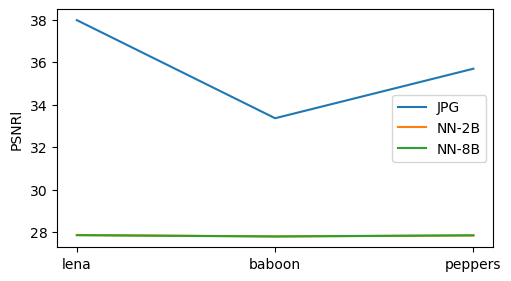

In [122]:
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(["lena","baboon","peppers"], [37.98461930708778,33.36503342268192,35.697918595176105], label='JPG')
ax.plot(["lena","baboon","peppers"], [27.868830634932493,27.797059717694506,27.846257320731954 ], label='NN-2B') 
ax.plot(["lena","baboon","peppers"], [ 27.85517705261228, 27.79690748078172, 27.850076333508945 ], label='NN-8B')  

ax.set_ylabel('PSNRl')  # Add a y-label to the axes.
ax.legend()  # Add a legend.

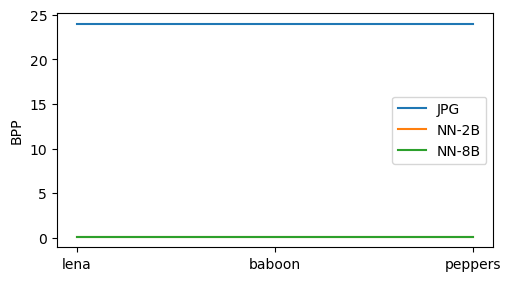

In [123]:
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(["lena","baboon","peppers"], [24,24,24], label='JPG')
ax.plot(["lena","baboon","peppers"], [0.125, 0.125 ,0.125], label='NN-2B') 
ax.plot(["lena","baboon","peppers"], [0.125, 0.125 ,0.125], label='NN-8B') 

ax.set_ylabel('BPP')
ax.legend()